In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

df= pd.read_csv("http://bit.ly/w-data")
print(df.describe())
df.head(5) #TO predict Score

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualize

<IPython.core.display.Javascript object>


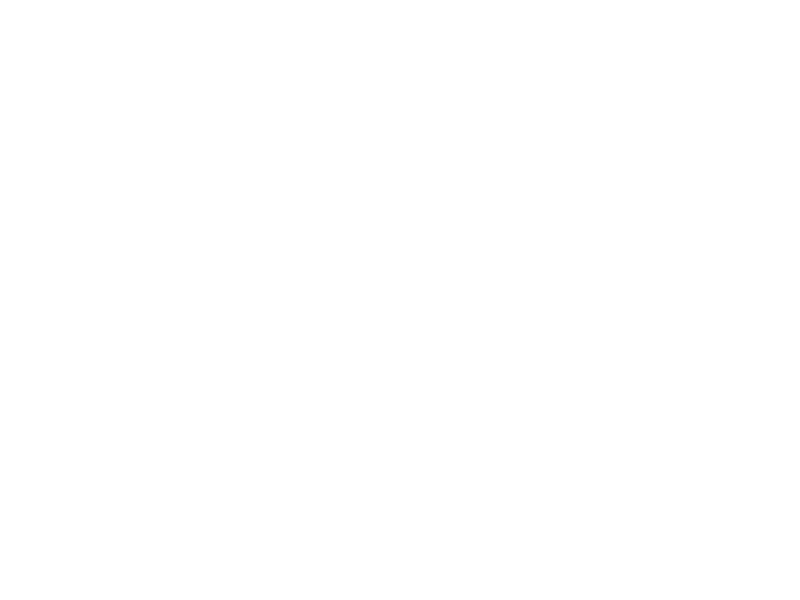

In [57]:
df.plot(x='Hours',y='Scores',style="o")
plt.show()

# A simple Linear Reg will be good 

In [58]:
#Data prep

X=df.loc[:,"Hours"].values.reshape(len(df.loc[:,"Hours"].values),1)
y=df.loc[:,"Scores"].values.reshape(len(df.loc[:,"Hours"].values),1)
X.shape,y.shape

((25, 1), (25, 1))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [60]:
#Model

from sklearn.linear_model import LinearRegression
linear= LinearRegression()
model= linear.fit(X_train,y_train)
print("Intercept=",model.intercept_)
print("Coef=",model.coef_)

Intercept= [1.93220425]
Coef= [[9.94167834]]


<IPython.core.display.Javascript object>


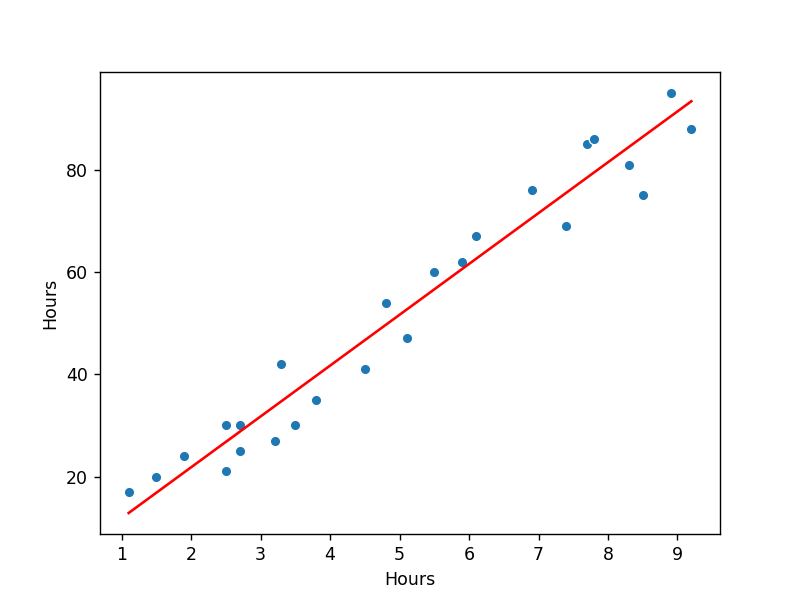

In [61]:
#Viz
import seaborn as sns

line= df["Hours"]*np.squeeze(model.coef_) + model.intercept_
%matplotlib notebook
sns.scatterplot("Hours","Scores",data=df)
sns.lineplot("Hours",line,data=df,color="r")


In [62]:
from sklearn import metrics

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, model.predict(X_test)))#mean 5.01

Mean Absolute Error: 4.130879918502486


In [63]:
model= linear.fit(X,y)

# Predict Final Value

In [64]:
arr=np.array(9.25).reshape(1,1)
print("Predicted score if a student study for 9.25 hrs in a day,",np.squeeze(model.predict(arr)))

Predicted score if a student study for 9.25 hrs in a day, 92.90985477015731
